### Import necessity libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Load loan dataset

In [2]:
dataset = pd.read_csv('Salary_dataset.csv', usecols=["Years_of_Experience", "Salary"])
dataset

,Years_of_Experience,Salary
0,5.0,90000
1,3.0,65000
2,15.0,150000
3,7.0,60000
4,20.0,200000
...,...,...
368,8.0,85000
369,19.0,170000
370,2.0,40000
371,7.0,90000


### EDA and Feature Engineering

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years_of_Experience  373 non-null    float64
 1   Salary               373 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.0 KB


In [4]:
dataset.describe()

,Years_of_Experience,Salary
count,373.000000,373.000000
mean,10.030831,100577.345845
std,6.557007,48240.013482
min,0.000000,350.000000
25%,4.000000,55000.000000
50%,9.000000,95000.000000
75%,15.000000,140000.000000
max,25.000000,250000.000000


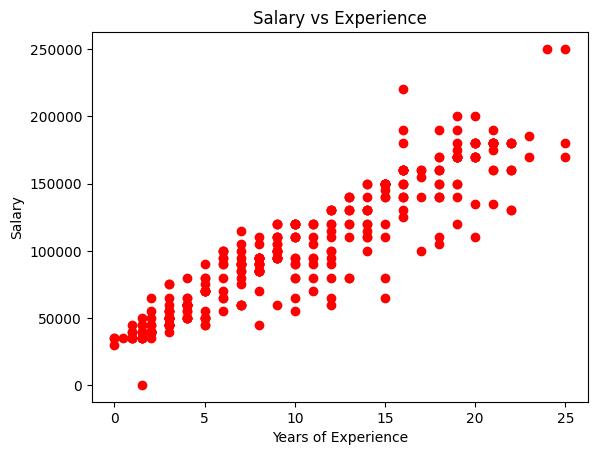

In [5]:
plt.scatter(dataset['Years_of_Experience'], dataset['Salary'], color = 'red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [6]:
import numpy as np 
np.corrcoef(dataset['Years_of_Experience'], dataset['Salary'])[0][1]

0.9303377227618356

### Data preparation

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((298, 1), (75, 1), (298,), (75,))

### Model building

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)
y_pred

array([174795.47129497,  99746.97937009, 140682.52042002,  72456.61867014,
       147505.11059501, 154327.70077   , 181618.06146996,  99746.97937009,
        51988.84814517,  92924.3891951 , 120214.74989506, 174795.47129497,
        45166.25797018,  92924.3891951 , 127037.34007005,  51988.84814517,
        65634.02849515,  41754.96288269,  79279.20884513,  86101.79902012,
        99746.97937009,  92924.3891951 , 140682.52042002,  65634.02849515,
        72456.61867014,  58811.43832016, 154327.70077   ,  45166.25797018,
       120214.74989506, 161150.29094499,  51988.84814517, 127037.34007005,
        51988.84814517, 133859.93024504,  99746.97937009,  34932.3727077 ,
       174795.47129497,  45166.25797018, 154327.70077   ,  58811.43832016,
        45166.25797018,  92924.3891951 , 202085.83199492, 161150.29094499,
        45166.25797018, 140682.52042002, 106569.56954508,  45166.25797018,
        45166.25797018,  45166.25797018, 161150.29094499,  86101.79902012,
       120214.74989506, 1

In [12]:
y_test

array([180000,  65000, 125000,  80000, 140000, 160000, 160000, 120000,
        50000,  95000, 140000, 160000,  35000,  95000, 110000,  50000,
        90000,  50000,  90000,  95000, 110000, 105000, 190000,  70000,
       100000,  50000, 160000,  40000, 120000, 170000,  45000, 100000,
        60000, 150000, 110000,  35000, 180000,  50000, 140000,  50000,
        40000, 100000, 250000, 170000,  40000, 140000, 120000,  65000,
        55000,  40000, 180000,  90000, 130000, 100000, 110000, 130000,
       170000,  60000, 180000, 100000, 100000, 150000, 180000,  75000,
        45000,  40000,  45000, 110000,  40000,  30000,  75000,  90000,
        60000, 140000, 110000])

### Evaluation

In [13]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 90.0%


In [14]:
#residuals = y_test - y_pred
#residuals

In [15]:
model.predict([[1.2]])

array([39708.18583019])

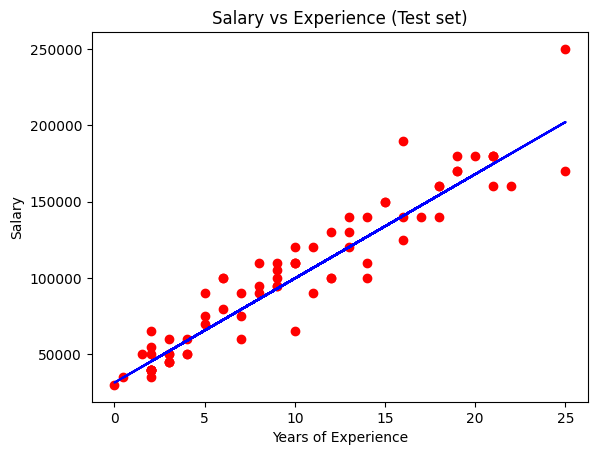

In [16]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
print(model.coef_) #or slope
print(model.intercept_)

## Linear regression equation: Salary = 6822.59017499 × YearsExperience + 31521.077620206008

[6822.59017499]
31521.077620206008


### Save Model

In [18]:
#using pickle to save trained medel and use later
import pickle

filename = 'finalized_model.pkl'

# Assume 'model' is your trained model
# Save the model to disk
pickle.dump(model, open(filename, 'wb'))

In [19]:
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

loaded_model.predict([[1.2]])[0]

39708.18583019243